In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, contextlib, sys
plt.rcParams["font.size"] = 13

# Sets the directory to the current directory
os.chdir(sys.path[0])


data_dict = dict()

user_name = input('What is your name? [Simone/Jonathan/Marcus/Runi]')

if user_name == 'Simone':
    print('Welcome, master!')
elif user_name == 'Jonathan':
    directory = r'C:\Users\jonat\Documents\GitHub\finalproject'
    os.chdir(directory)
elif user_name == 'Runi':
    directory = r'D:\Sapientia\Dropbox\Fysik på KU\Big Data Analysis\Final Project'
    os.chdir(directory)
elif user_name == 'Marcus':
    directory = r'C:\Users\Marcus96\Documents\GitHub\finalprojectMarcus'
    os.chdir(directory)

def loaddata(directory):
        for filename in os.listdir(directory):
            raw_data = np.genfromtxt(f'{directory}/{filename}', delimiter=',', names=True)
            data_matrix = np.genfromtxt(f'{directory}/{filename}', delimiter=',')
            date = filename.split(sep='_')[2]
            data_dict.update({f'{date}_data': data_matrix})
            data_dict.update({f'{date}_features': list(raw_data.dtype.names)})
loaddata('data')
#print(data_dict)

What is your name? [Simone/Jonathan/Marcus/Runi]Jonathan


### The timeseries

In [2]:
all_keys = tuple(data_dict.keys())
keys = [all_keys[i] for i in range(len(all_keys)) if i%2==0]

x = np.array([data_dict[keys[i]][:,0] for i in range(len(keys))])
y = np.array([data_dict[keys[i]][:,1] for i in range(len(keys))])

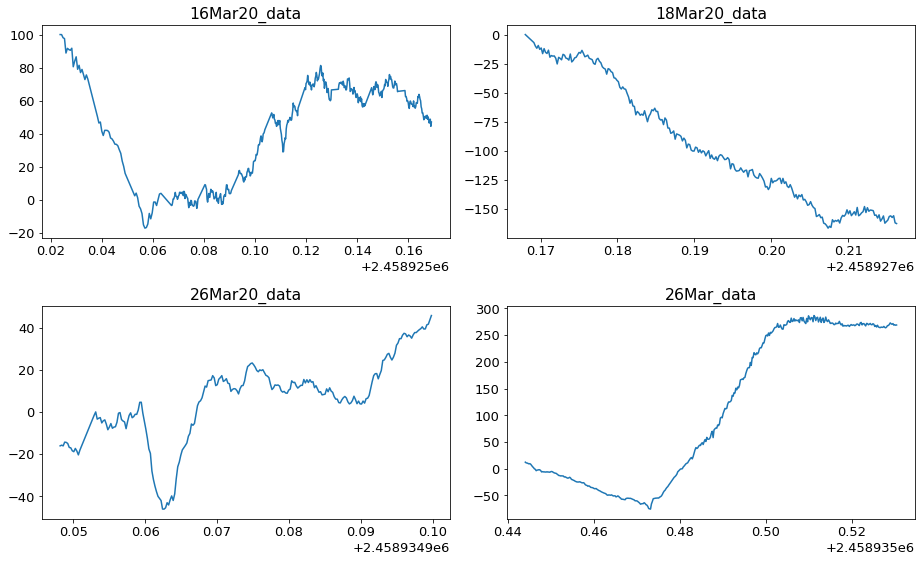

In [3]:
plt.figure(figsize=(13,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(keys[i])
    plt.plot(x[i], y[i])
plt.tight_layout()
plt.show()

### Stacked histograms of feature distributions

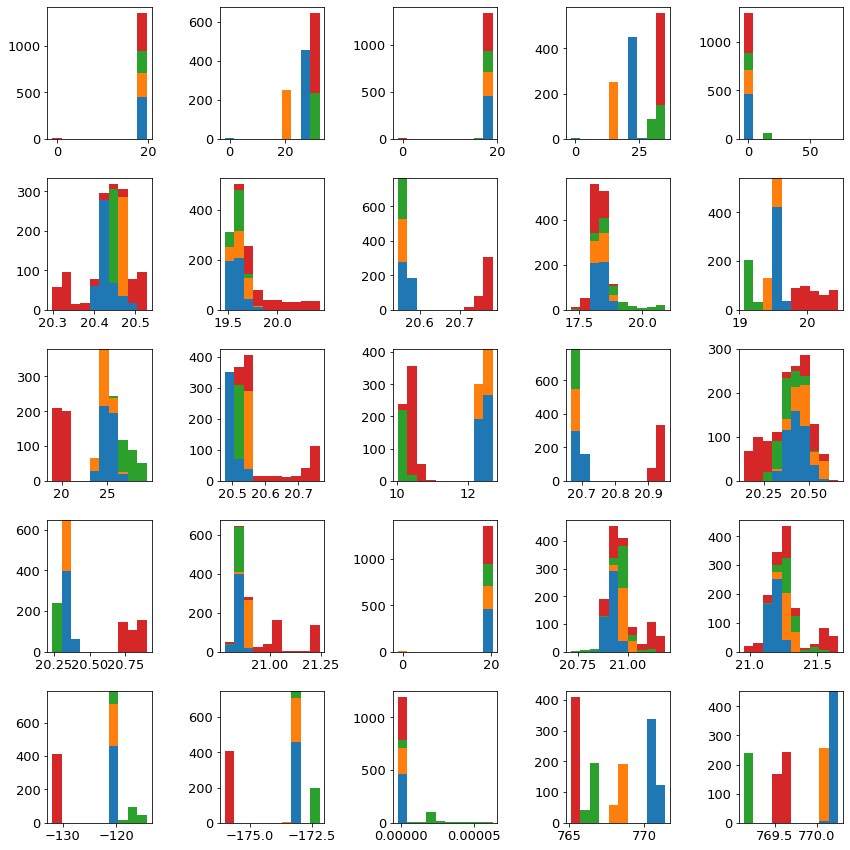

In [8]:
plt.figure(figsize=(12,12))
for i in range( 3, data_dict[keys[0]].shape[1] ):
    plt.subplot(5,5,i-2)
    plt.hist([data_dict[keys[0]][:,i], data_dict[keys[1]][:,i], data_dict[keys[2]][:,i], data_dict[keys[3]][:,i]], 
             histtype='barstacked', align='left')
plt.tight_layout()
plt.show()

### t-SNE

In [41]:
from sklearn.manifold import TSNE
# Collect all data in a single array
data = data_dict[keys[0]]
for i in range(1,4):
    data = np.append(data, data_dict[keys[i]],axis=0)
    
y_labels = data[:,1]
X = data[:,3:]

# Remove nan
remove = np.isnan(X)[:,0]
remove1 = [i for i in range(len(remove)) if remove[i]==False]
X = X[remove1,:]
y_labels = y_labels[remove1]

tsne = TSNE(n_components = 2, n_jobs=-1, verbose=0, random_state=42)
tsne_data = tsne.fit_transform(X)

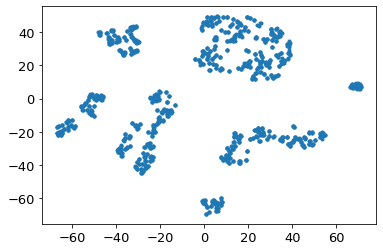

In [44]:
plt.figure()
plt.plot(tsne_data[:,0], tsne_data[:,1],'.')
plt.show()